In [9]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [10]:
csv_list = glob.glob("*.csv")

In [11]:
mean_resolution = []
mean_fps = []
mean_buffer = []

all_resolutions = []
all_fps = []
all_buffer = []

for csv_path in csv_list:
    res = np.array([[int(x.split(',')[1].split('x')[0]), int(x.split(',')[1].split('x')[1].split('@')[0])] for x in open(csv_path).read().split('\n')[:-1]])
    mean_res = np.mean(res, axis = 0)
    mean_resolution.append(mean_res)
    all_resolutions.append(res)
    
    res_fps = np.array([int(x.split(',')[1].split('@')[-1]) for x in open(csv_path).read().split('\n')[:-1]])
    fps = np.mean(res_fps)
    mean_fps.append(fps)
    all_fps.append(res_fps)
    
    res_buffer_size = np.array([float(x.split(',')[2]) for x in open(csv_path).read().split('\n')[:-1]])
    mean_buffer_size = np.mean(res_buffer_size)
    mean_buffer.append(mean_buffer_size)
    all_buffer.append(mean_buffer_size)

mean_resolution = np.array(mean_resolution)
mean_fps = np.array(mean_fps)
mean_buffer = np.array(mean_buffer)

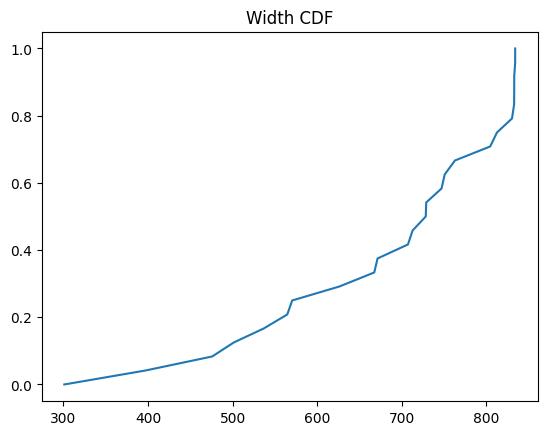

In [12]:
data_sorted = np.sort(mean_resolution[:, 0])
p = 1. * np.arange(len(mean_resolution)) / (len(mean_resolution) - 1)

plt.plot(data_sorted, p)
plt.title("Width CDF")
plt.show()

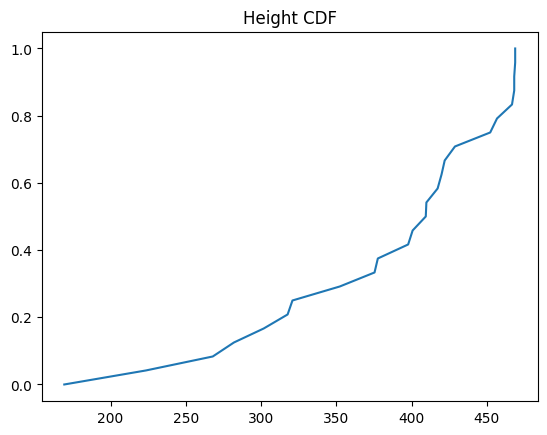

In [13]:
data_sorted = np.sort(mean_resolution[:, 1])
p = 1. * np.arange(len(mean_resolution)) / (len(mean_resolution) - 1)

plt.plot(data_sorted, p)
plt.title("Height CDF")
plt.show()

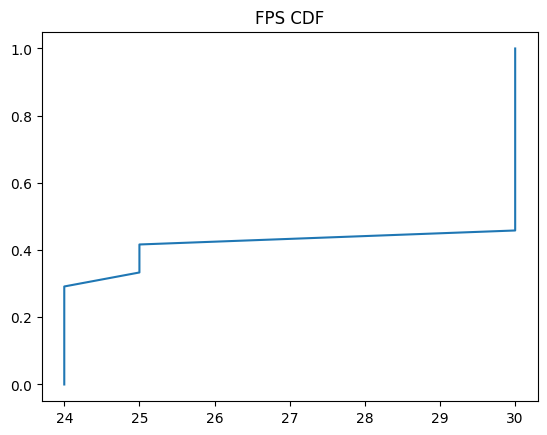

In [14]:
data_sorted = np.sort(mean_fps)
p = 1. * np.arange(len(mean_fps)) / (len(mean_fps) - 1)

plt.plot(data_sorted, p)
plt.title("FPS CDF")
plt.show()

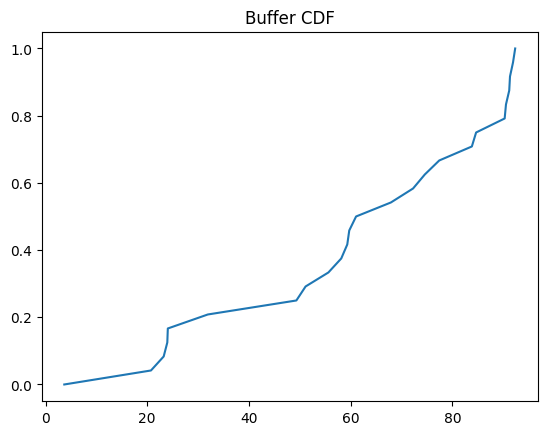

In [15]:
data_sorted = np.sort(mean_buffer)
p = 1. * np.arange(len(mean_buffer)) / (len(mean_buffer) - 1)

plt.plot(data_sorted, p)
plt.title("Buffer CDF")
plt.show()

In [16]:
log_list = glob.glob("*.log")

In [17]:
all_startup_time = [float(open(x).read().split("Startup Time,")[-1].split('\n')[0]) for x in log_list]
all_avg_network_bw = [float(open(x).read().split("Average Network Bandwidth,")[-1].split('\n')[0]) for x in log_list]
all_var_network_bw = [float(open(x).read().split("Variance of Network Bandwidth,")[-1].split('\n')[0]) for x in log_list]

all_startup_time = np.array(all_startup_time)
all_avg_network_bw = np.array(all_avg_network_bw)
all_var_network_bw = np.array(all_var_network_bw)

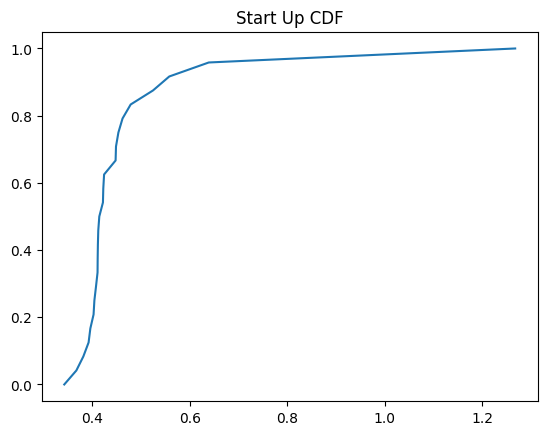

In [18]:
data_sorted = np.sort(all_startup_time)
p = 1. * np.arange(len(all_startup_time)) / (len(all_startup_time) - 1)

plt.plot(data_sorted, p)
plt.title("Start Up CDF")
plt.show()

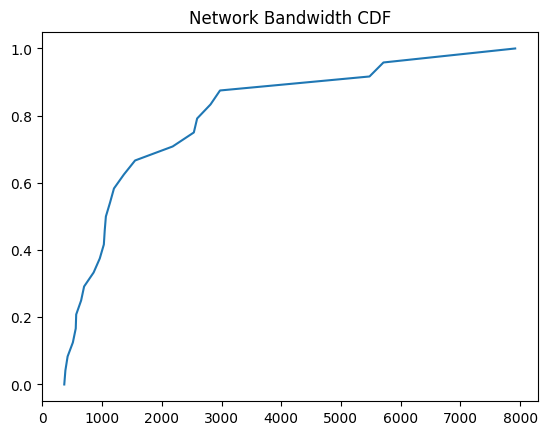

In [19]:
data_sorted = np.sort(all_avg_network_bw)
p = 1. * np.arange(len(all_avg_network_bw)) / (len(all_avg_network_bw) - 1)

plt.plot(data_sorted, p)
plt.title("Network Bandwidth CDF")
plt.show()

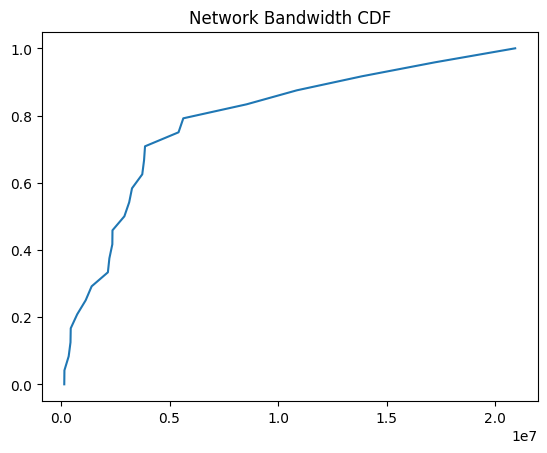

In [20]:
data_sorted = np.sort(all_var_network_bw)
p = 1. * np.arange(len(all_var_network_bw)) / (len(all_var_network_bw) - 1)

plt.plot(data_sorted, p)
plt.title("Network Bandwidth CDF")
plt.show()

In [1]:
import glob
from scapy.all import rdpcap, Raw

In [2]:
pcap_list = glob.glob("*.pcap")

In [3]:
pcap_data = rdpcap(pcap_list[23])

In [6]:
for packet in pcap_data:
    if 'UDP' in packet:
        print(packet.summary())

Ether / IP / UDP 192.168.1.138:56061 > 142.250.194.238:https / Raw
Ether / IP / UDP 192.168.1.138:56061 > 142.250.194.238:https / Raw
Ether / IP / UDP 192.168.1.138:56061 > 142.250.194.238:https / Raw
Ether / IP / UDP 142.250.194.238:https > 192.168.1.138:56061 / Raw
Ether / IP / UDP 142.250.194.238:https > 192.168.1.138:56061 / Raw
Ether / IP / UDP 192.168.1.138:56061 > 142.250.194.238:https / Raw
Ether / IP / UDP 142.250.194.238:https > 192.168.1.138:56061 / Raw
Ether / IP / UDP 192.168.1.138:56061 > 142.250.194.238:https / Raw
Ether / IP / UDP 142.250.194.238:https > 192.168.1.138:56061 / Raw
Ether / IP / UDP 142.250.194.238:https > 192.168.1.138:56061 / Raw
Ether / IP / UDP 142.250.194.238:https > 192.168.1.138:56061 / Raw
Ether / IP / UDP 142.250.194.238:https > 192.168.1.138:56061 / Raw
Ether / IP / UDP 142.250.194.238:https > 192.168.1.138:56061 / Raw
Ether / IP / UDP 192.168.1.138:56061 > 142.250.194.238:https / Raw
Ether / IP / UDP 192.168.1.138:56061 > 142.250.194.238:https /

[832.84883721 468.13953488]
58845


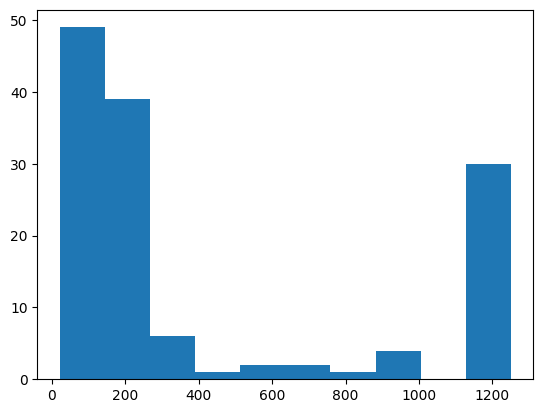

In [21]:
ind = 0
pcap_data = rdpcap(pcap_list[ind])
packet_lengths = []
for packet in pcap_data:
    if 'UDP' not in packet:
        continue
    if Raw not in packet['UDP']:
        continue
    packet_lengths.append(len(packet['UDP'][Raw].load))
print(mean_resolution[ind])
print(np.sum(packet_lengths))
plt.hist(np.array(packet_lengths))
plt.show()

[707.18604651 397.6744186 ]
60170


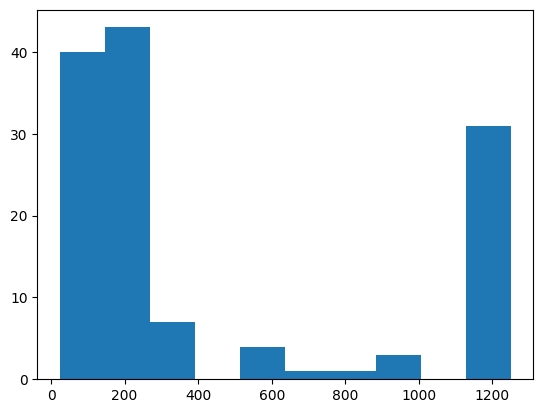

In [22]:
ind = 10
pcap_data = rdpcap(pcap_list[ind])
packet_lengths = []
for packet in pcap_data:
    if 'UDP' not in packet:
        continue
    if Raw not in packet['UDP']:
        continue
    packet_lengths.append(len(packet['UDP'][Raw].load))
print(mean_resolution[ind])
print(np.sum(packet_lengths))
plt.hist(np.array(packet_lengths))
plt.show()